In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
classes = 2
layer_dims = [10, classes] 
learning_rate = 0.001
keep_prob = 0.8
minibatch_size = 64
momentum = 0.97
maxnorm_clip = 3
print_summary = False
isBinary = classes == 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, keep_prob, minibatch_size, momentum, maxnorm_clip)
print(hyperparams)

{'KEY_LAYER_DIMS': [10, 2], 'KEY_DROPOUT_KEEP_PROB': 0.8, 'KEY_LEARNING_RATE': 0.001, 'KEY_MINI_BATCH_SIZE': 64, 'KEY_ADAM_BETA1': 0.97, 'KEY_MAX_NORM_CLIP': 3}


In [3]:
# Generate data
m = 1000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x).astype('float32')
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m)).astype('float32')[0]
else:
    y_test = np.random.randint(classes, size=(1, m)).astype('float32')[0]

df = pd.DataFrame(x_data)
df[label] = y_test
classification = len(set(y_test))
print(classification)

2


Setting hyperparameters...
train_x.shape: (700, 100)
train_y.shape: (700, 2)
dev_x.shape: (300, 100)
dev_y.shape: (300, 2)
Configuring graph...
Model ID: 1
Binary classification neural network with hyperparameters:
layer_dims: [10, 2] dropoutKeepProb: 0.800000011920929 learning_rate: 0.0010000000474974513 num_epochs: 250
minibatch_size: 64 momentum: 0.9700000286102295 maxnormclip: 3.0
Saving metagraph to ./saved_model_1/dnn
Training underway...
Cost after epoch 0: 0.800315
Cost after epoch 20: 0.752928
Cost after epoch 40: 0.727470
Cost after epoch 60: 0.691748
Cost after epoch 80: 0.645458
Cost after epoch 100: 0.613201
Cost after epoch 120: 0.593669
Cost after epoch 140: 0.577468
Cost after epoch 160: 0.574992
Cost after epoch 180: 0.558355
Cost after epoch 200: 0.548577
epoch to save 200
Saving checkpoint at epoch: 200
Cost after epoch 220: 0.542209
Cost after epoch 240: 0.529629
epoch to save 250
Saving checkpoint at epoch: 250
Done Training!


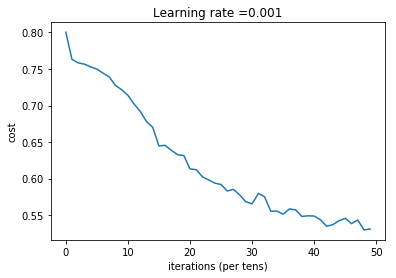

train_accuracy_percent : 86.7142856121
test_accuracy_percent : 49.6666669846
precision_percent : 49.6666666667
recall_percent : 49.6666666667
f1score : 49.6666666667



In [4]:
nn = DNN()
nn.set_hyperparameters(hyperparams)
(train_x, train_y, dev_x, dev_y) = DNN.split_data(df, label, 0.7)
nn.configure_graph(train_x, train_y)
results = nn.train(train_x, train_y, dev_x, dev_y, num_epochs = 250, print_summary = True, checkpoint_interval = 200)

In [5]:
predictions = nn.predict(x_data)
print(predictions.shape)

(1000,)


In [6]:
dnn2 = DNN()
dnn2.restore_saved_model(1, 200)

INFO:tensorflow:Restoring parameters from ./saved_model_1/dnn-200


Model ID: 1
Binary classification neural network with hyperparameters:
layer_dims: [Dimension(10), Dimension(2)] dropoutKeepProb: 0.800000011920929 learning_rate: 0.0010000000474974513 num_epochs: 250
minibatch_size: 64 momentum: 0.9700000286102295 maxnormclip: 3.0
Saving metagraph to ./saved_model_1/dnn
Resuming training from previous epoch of 200
Training underway...
Cost after epoch 0: 0.802095
Cost after epoch 20: 0.748176
Cost after epoch 40: 0.726832
Cost after epoch 60: 0.690449
Cost after epoch 80: 0.654054
Cost after epoch 100: 0.621250
Cost after epoch 120: 0.602318
Cost after epoch 140: 0.584969
Cost after epoch 160: 0.571484
Cost after epoch 180: 0.569980
Cost after epoch 200: 0.550183
epoch to save 400
Saving checkpoint at epoch: 400
Cost after epoch 220: 0.555344
Cost after epoch 240: 0.532487
epoch to save 450
Saving checkpoint at epoch: 450
Done Training!


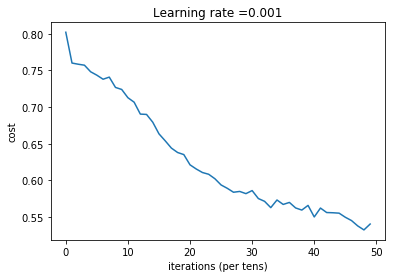

train_accuracy_percent : 84.4285726547
test_accuracy_percent : 44.9999988079
precision_percent : 45.0
recall_percent : 45.0
f1score : 45.0



In [7]:
results2 = dnn2.train(train_x, train_y, dev_x, dev_y, num_epochs = 250, print_summary = True, checkpoint_interval = 200)